In [11]:
%pip install contextily
%pip install homeharvest
%pip install geopy
%pip install geopandas
%pip install seaborn
%pip install pgeocode
%pip install geoplot


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [12]:
import geopandas as gpd
from shapely.geometry import Point
import contextily as ctx
import matplotlib.pyplot as plt
import seaborn as sns
import shapely



# Import data from generated geojson and create the city maps

In [13]:
import contextily as ctx
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
from geopy.geocoders import Nominatim
from shapely.geometry import Point
from shapely.geometry import box

# Import file
usa_parks = gpd.read_file("/Users/amanagrawal/Desktop/Data Sci 2025/USA_Parks.geojson")

#Boundary box dataset: https://boundingbox.klokantech.com/

def filter_dataset(minx, miny, maxx, maxy):
  ''' Takes in minx miny maxx maxy'''

  # You can refine these bounds as needed
  bbox = box(minx, miny, maxx, maxy)  # (minx, miny, maxx, maxy)

  # Create a GeoDataFrame for the LA bounding box
  la_boundary = gpd.GeoDataFrame([1], geometry=[bbox], crs=usa_parks.crs)

  # Filter parks that intersect with the LA bounding box
  la_parks = usa_parks[usa_parks.geometry.intersects(bbox)]


  return la_parks

# LA
la_parks = filter_dataset(-118.9448, 33.7045, -118.1553, 34.3373)

# Chicago
chi_parks = filter_dataset(-88.263641, 41.469705, -87.111162, 42.154292)

# New York
ny_parks = filter_dataset(-74.258843,40.476578,-73.700233,40.91763)


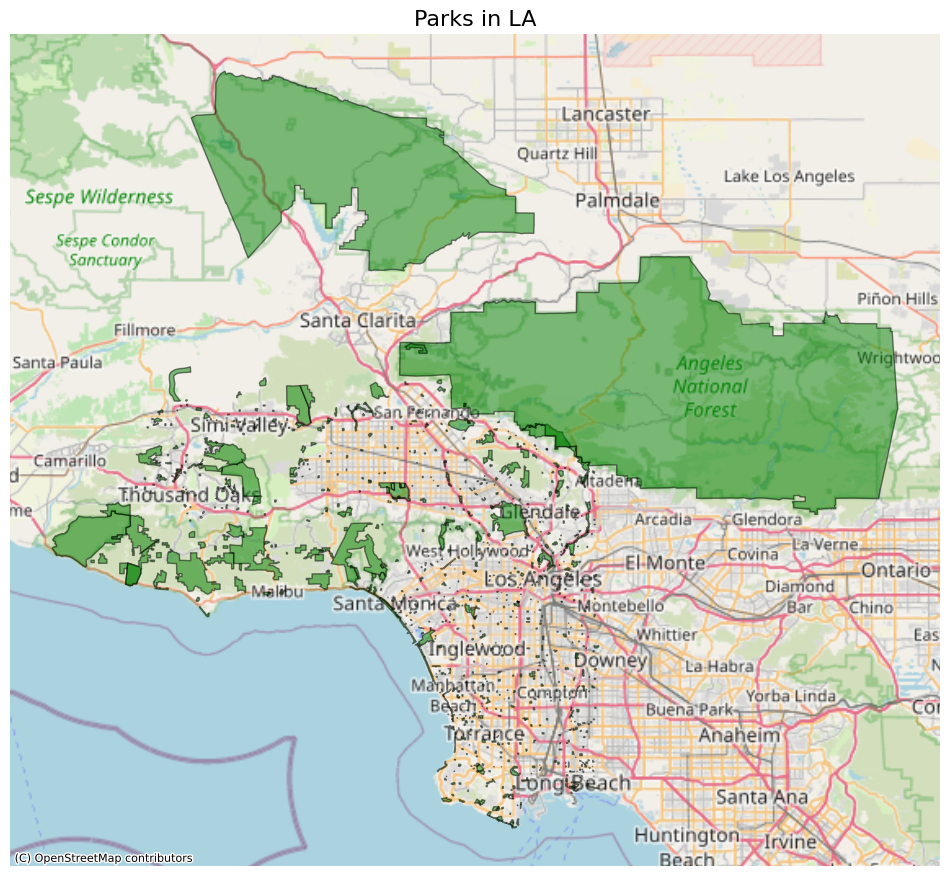

In [14]:
def make_plot(gdf, title):
  gdf = gdf.to_crs(epsg=3857)

  # Plot the GeoDataFrame
  fig, ax = plt.subplots(figsize=(12, 12))
  gdf.plot(ax=ax, color='green', alpha=0.5, edgecolor='black')

  # Add OpenStreetMap basemap
  ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

  # Customize the plot
  ax.set_title(title, fontsize=16)
  ax.set_axis_off()

  plt.show()

make_plot(la_parks, "Parks in LA")

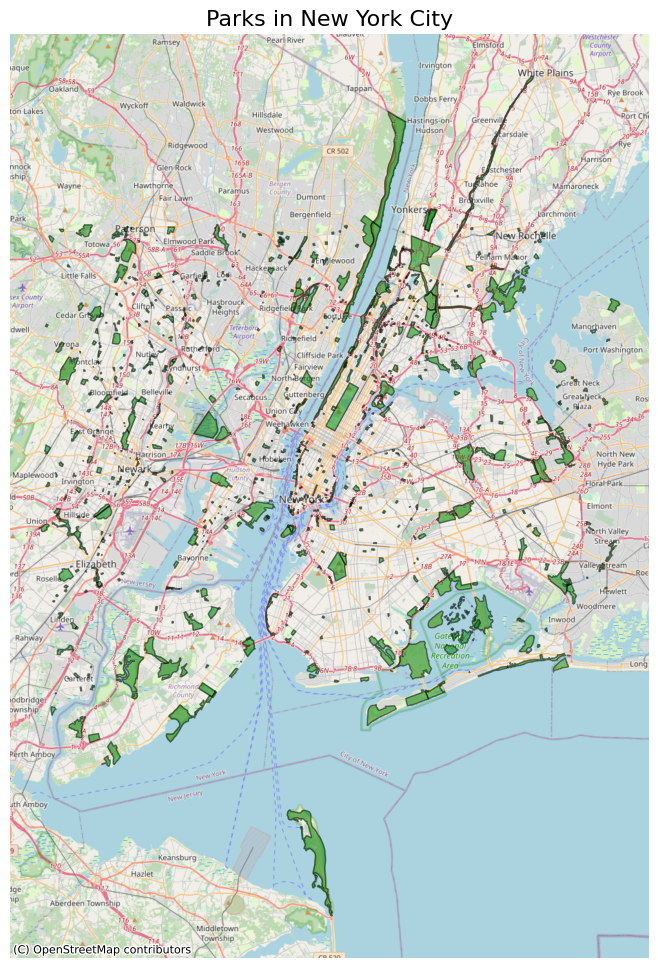

In [11]:
make_plot(ny_parks, "Parks in New York City")

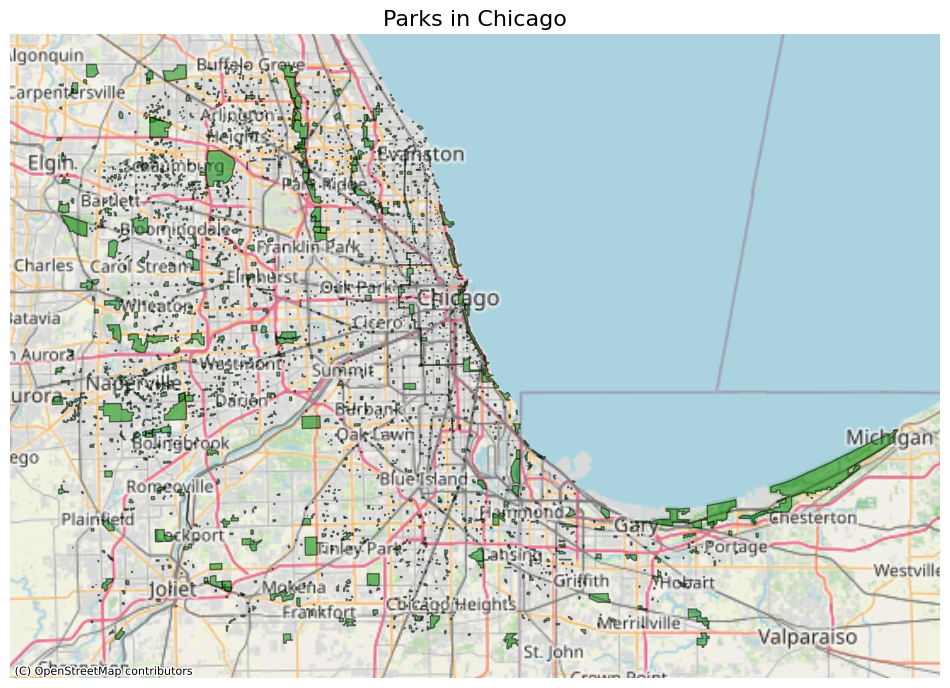

In [12]:
make_plot(chi_parks, "Parks in Chicago")

In [13]:
our_parks = pd.concat([la_parks, ny_parks, chi_parks])

# Geocode property values

In [ ]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

# Load the neighborhoods dataset
neighborhoods_file_path = '/Users/amanagrawal/Desktop/Data Sci 2025/usneighborhoods.csv'
neighborhoods_data = pd.read_csv(neighborhoods_file_path)

# Convert neighborhoods dataset to GeoDataFrame using lat/lng
neighborhoods_data['geometry'] = neighborhoods_data.apply(
    lambda row: Point(row['lng'], row['lat']), axis=1
)
neighborhoods_gdf = gpd.GeoDataFrame(neighborhoods_data, geometry='geometry')

# Load the property values dataset
property_values_file_path = '/Users/amanagrawal/Desktop/Data Sci 2025/property values by neighborhood.csv'
property_values_data = pd.read_csv(property_values_file_path)

# Merge the two datasets on the neighborhood name
merged_gdf = neighborhoods_gdf.merge(property_values_data, 
                                      left_on='neighborhood', 
                                      right_on='RegionName', 
                                      how='inner')

# Save the result as a GeoJSON file for further use
output_geojson_path = 'merged_property_values.geojson'
merged_gdf.to_file(output_geojson_path, driver='GeoJSON')

print(f"GeoDataFrame successfully saved to: {output_geojson_path}")

print(merged_gdf.head())


/Users/amanagrawal/Desktop/Data Sci 2025/.venv/lib/python3.13/site-packages/pyogrio/geopandas.py:662: UserWarning: 'crs' was not provided.  The output dataset will not have projection information defined and may not be usable in other systems.
  write(


GeoDataFrame successfully saved to: merged_property_values.geojson
                neighborhood         neighborhood_ascii       lat       lng  \
0  Atlanta University Center  Atlanta University Center  33.74947 -84.41125   
1               Hunter Hills               Hunter Hills  33.75872 -84.43123   
2               Hunter Hills               Hunter Hills  33.75872 -84.43123   
3               Hunter Hills               Hunter Hills  33.75872 -84.43123   
4                   Bankhead                   Bankhead  33.76901 -84.42452   

  city_name     city_id state_name state_id   source          timezone  ...  \
0   Atlanta  1840013660    Georgia       GA  polygon  America/New_York  ...   
1   Atlanta  1840013660    Georgia       GA  polygon  America/New_York  ...   
2   Atlanta  1840013660    Georgia       GA  polygon  America/New_York  ...   
3   Atlanta  1840013660    Georgia       GA  polygon  America/New_York  ...   
4   Atlanta  1840013660    Georgia       GA  polygon  America/N

ValueError: Cannot transform naive geometries.  Please set a crs on the object first.

/Users/amanagrawal/Desktop/Data Sci 2025/.venv/lib/python3.13/site-packages/pyogrio/raw.py:198: RuntimeWarning: Several features with id = 184001366011101 have been found. Altering it to be unique. This warning will not be emitted anymore for this layer
  return ogr_read(


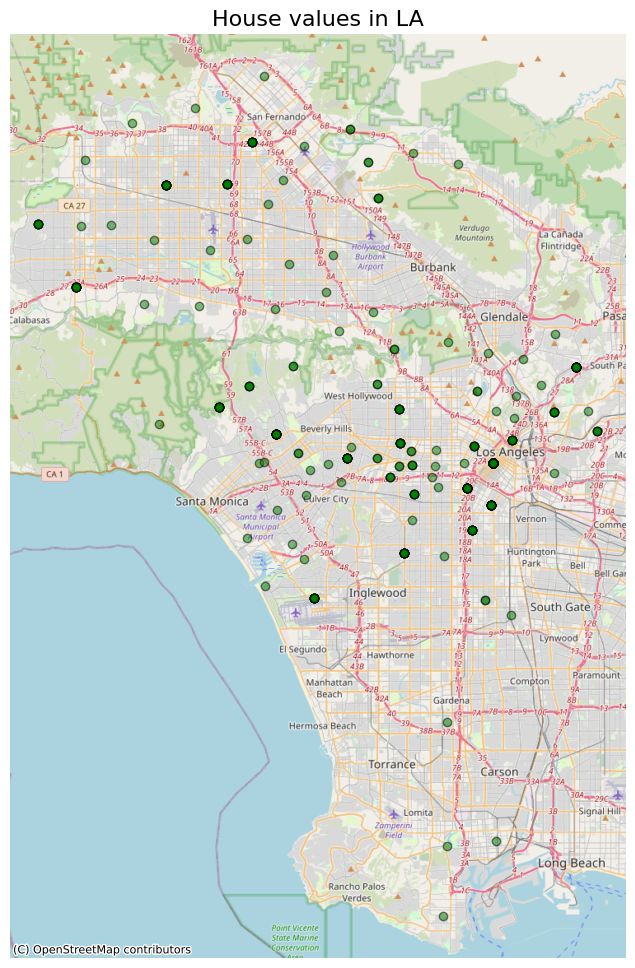

In [ ]:
import geoplot
import contextily as ctx
import matplotlib.pyplot as plt


usa_geoproperties = gpd.read_file('/Users/amanagrawal/Desktop/Data Sci 2025/merged_property_values.geojson')
usa_geoproperties.set_crs(epsg=4326, inplace=True)

# make the prop_value an integer value
usa_geoproperties['Prop_Values'] = usa_geoproperties['Prop_Values'].astype('int64')


#split into 3 dataframes
la_properties = usa_geoproperties[usa_geoproperties['city_name'] == 'Los Angeles']
ny_properties = usa_geoproperties[usa_geoproperties['city_name'] == 'New York']
chi_properties = usa_geoproperties[usa_geoproperties['city_name'] == 'Chicago']



make_plot(la_properties, "House values in LA")




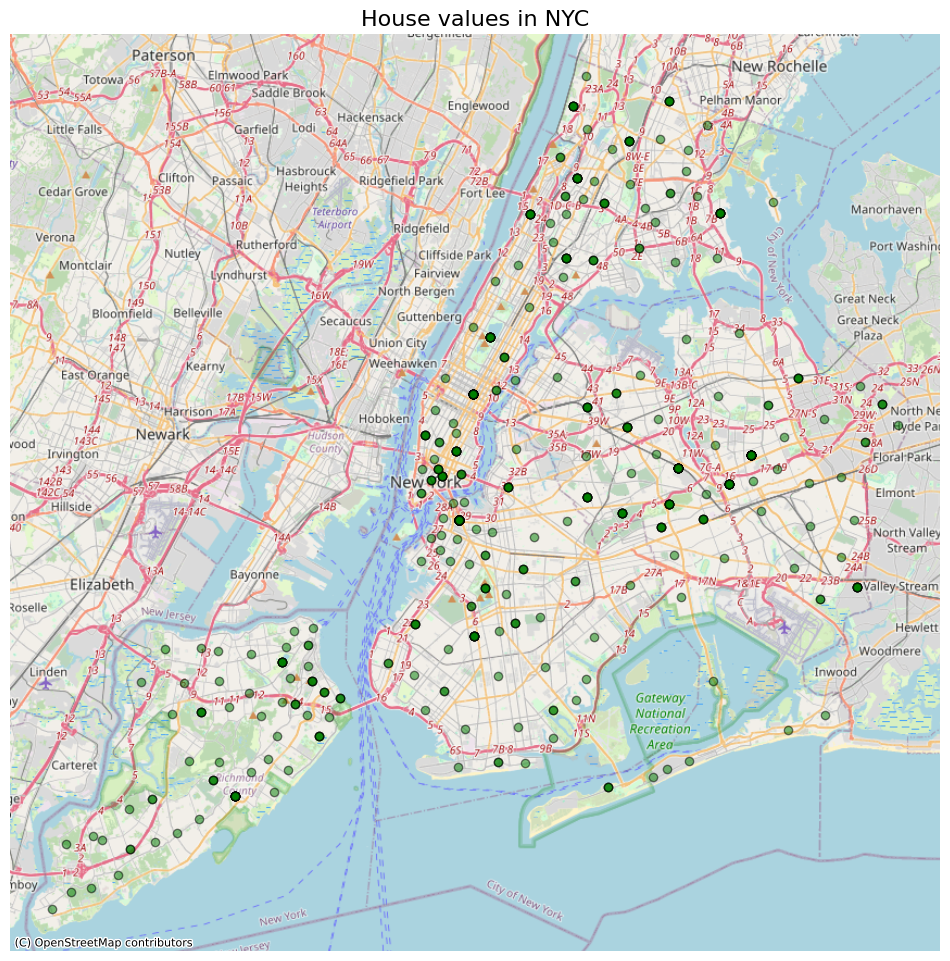

In [19]:
make_plot(ny_properties, "House values in NYC")


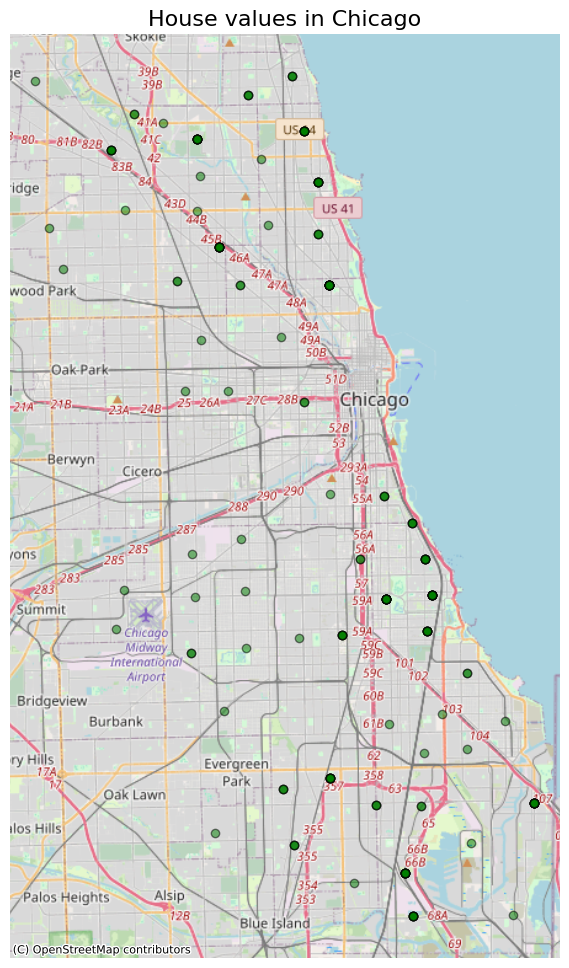

In [20]:
make_plot(chi_properties, "House values in Chicago")
